# Data Undurstanding 

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import joblib
import matplotlib.pyplot as plt
import warnings
# Ignore future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Load the dataset
data = pd.read_csv('Maternal Health Risk Data Set.csv')
data.head(5)



,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [3]:
#checking for the data shape 
data.shape

(1020, 7)

The dataset has 129 rows and 7 columns 

In [4]:
#looking into the data columns 
data.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

In [5]:
#data information 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1020 non-null   int64  
 1   SystolicBP   1020 non-null   int64  
 2   DiastolicBP  1020 non-null   int64  
 3   BS           1020 non-null   float64
 4   BodyTemp     1020 non-null   float64
 5   HeartRate    1020 non-null   int64  
 6   RiskLevel    1020 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.9+ KB


Our dataset has 4 integers, 2 floats and one integer 

In [6]:
# Display summary statistics
summary_stats = data.describe()
summary_stats

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000
mean,30.006863,113.187255,76.533333,8.718382,98.568039,74.407843
std,13.736228,18.847595,13.889931,3.298596,3.380594,8.617732
min,10.000000,0.000000,49.000000,0.000000,0.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.500000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.250000,120.000000,90.000000,8.000000,98.000000,80.000000
max,96.000000,190.000000,100.000000,19.000000,103.000000,168.000000


# Data Cleaning 

In [7]:
# Display missing values
data.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

Our data set has no missing values

In [8]:
#Checking for duplicates 
data.duplicated().sum()

562

Our data has 562 dudlicates

In [9]:
# Find exact duplicates (excluding the first occurrence)
exact_duplicates = data[data.duplicated()]

# Display exact duplicated rows
exact_duplicates


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
69,19,120,80,7.0,98.0,70,mid risk
74,19,120,80,7.0,98.0,70,mid risk
99,19,120,80,7.0,98.0,70,mid risk
108,50,140,90,15.0,98.0,90,high risk
109,25,140,100,6.8,98.0,80,high risk
...,...,...,...,...,...,...,...
1015,22,120,60,15.0,98.0,80,high risk
1016,55,120,90,18.0,98.0,60,high risk
1017,35,85,60,19.0,98.0,86,high risk
1018,43,120,90,18.0,98.0,70,high risk


In [10]:
# Drop duplicate rows, keeping the first occurrence
data_cleaned = data.drop_duplicates()

# Display the cleaned data
data_cleaned


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
707,15,100,49,7.6,98.0,77,low risk
708,12,100,50,6.0,98.0,70,mid risk
709,21,100,50,6.8,98.0,60,low risk
993,32,120,90,12.0,0.0,70,high risk


In [11]:
data_cleaned = data_cleaned.replace({'RiskLevel':{'low risk':0, 'mid risk':1 , 'high risk':2}})
data_cleaned 

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,2
1,35,140,90,13.0,98.0,70,2
2,29,90,70,8.0,100.0,80,2
3,30,140,85,7.0,98.0,70,2
4,35,120,60,6.1,98.0,76,0
...,...,...,...,...,...,...,...
707,15,100,49,7.6,98.0,77,0
708,12,100,50,6.0,98.0,70,1
709,21,100,50,6.8,98.0,60,0
993,32,120,90,12.0,0.0,70,2


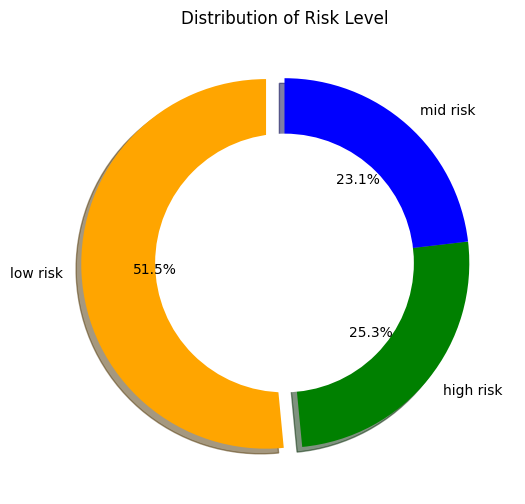

In [12]:
# Compute the value counts of the encoded 'RiskLevel'
risk_counts_encoded = data_cleaned['RiskLevel'].value_counts()
# Map numerical encoding back to the original categories for labels
labels = {0: 'low risk', 1: 'mid risk', 2: 'high risk'}
labels_encoded = [labels[i] for i in risk_counts_encoded.index]

# Explode the first slice for emphasis
explode = (0.1, 0, 0)  

# Plot
fig1, ax1 = plt.subplots(figsize=(8, 6))
ax1.pie(risk_counts_encoded, explode=explode, labels=labels_encoded, autopct='%1.1f%%', shadow=True, startangle=90, colors=["Orange",  "Green",  "Blue"])

# Draw a white circle at the center to create the doughnut effect
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Distribution of Risk Level')
plt.show()

low rist has higher distribtion of 51.5 %, followed by high rist at 25.3% and mid risk having 23.1%

# Data Analysis

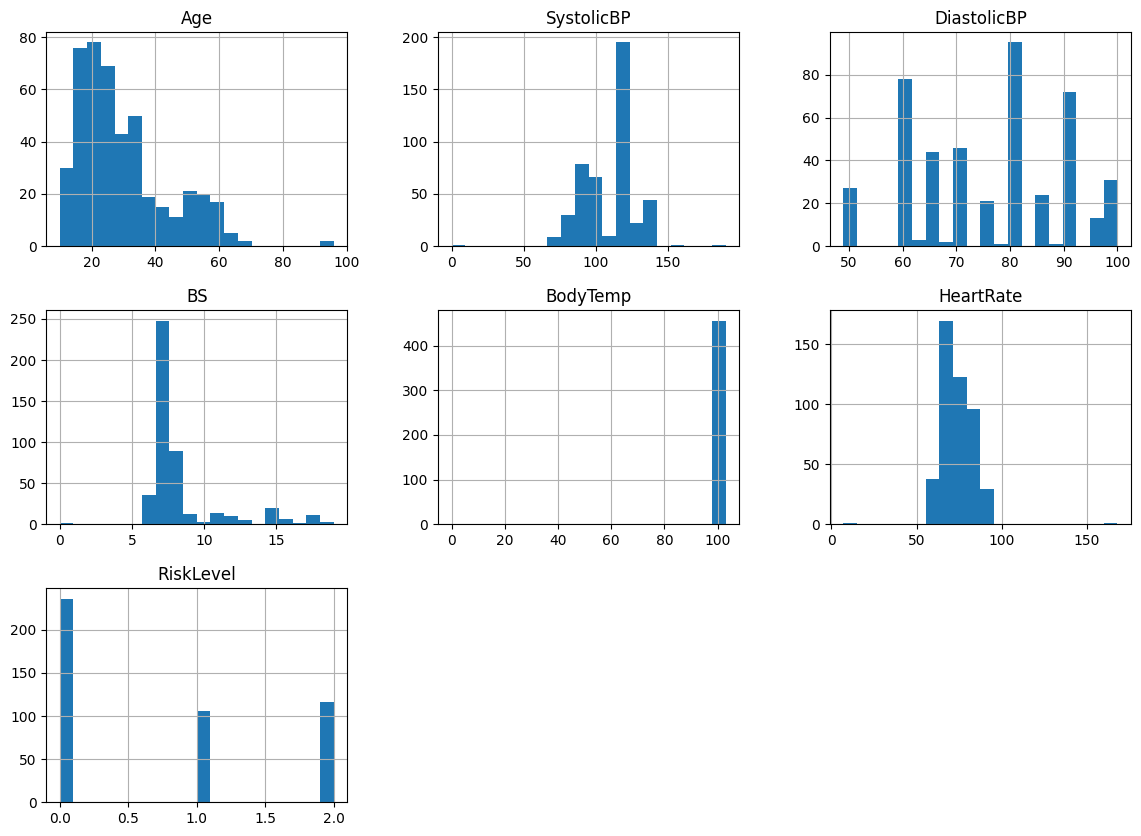

In [13]:
# Plot histograms for numerical attributes
data_cleaned.hist(bins=20, figsize=(14, 10))
plt.show()


Age: The age distribution is bimodal, with peaks at 20-25 and 50-55, implying that the dataset includes young adults as well as the elderly.

Systolic Blood Pressure (systolicBP): It is important that most values are in the range of 100-150 mmHg and most frequently in the range of 120-130 mmHg. Some values rise above 150 mmHg, meaning that there are instances of hypertension to some extent.

Diastolic Blood Pressure (DiastolicBP): This attribute also does not have noteworthy peaks but a wider range of possible diastolic blood pressure measurements, achieving the highest frequency between 80 and 90 mmHg. This also points towards the subject’s variability in diastolic pressure management.

Blood Sugar (BS): Almost all values tend to be located within the 5-10 units (probably mmol/L) range, and a significant number of them cluster around 7-8 units. Among some of the higher values, a few go up to about 17. Diet soda consumption was associated with an average of 5 units, which means a couple of the subjects could have diabetes-impaired glucose tolerance.

Body Temperature (Body Temperature): The peak is very narrow, with 98-100°F dominating almost all subjects, meaning most subjects are not infected with fever or hypothermia.

Heart Rate: It is symmetrical, around 70-80 bpm; most values are 60-100 bpm. This is prevalent with resting heart rates of such features for apparently healthy individuals; hence, it infers that the subjects have normal rates.

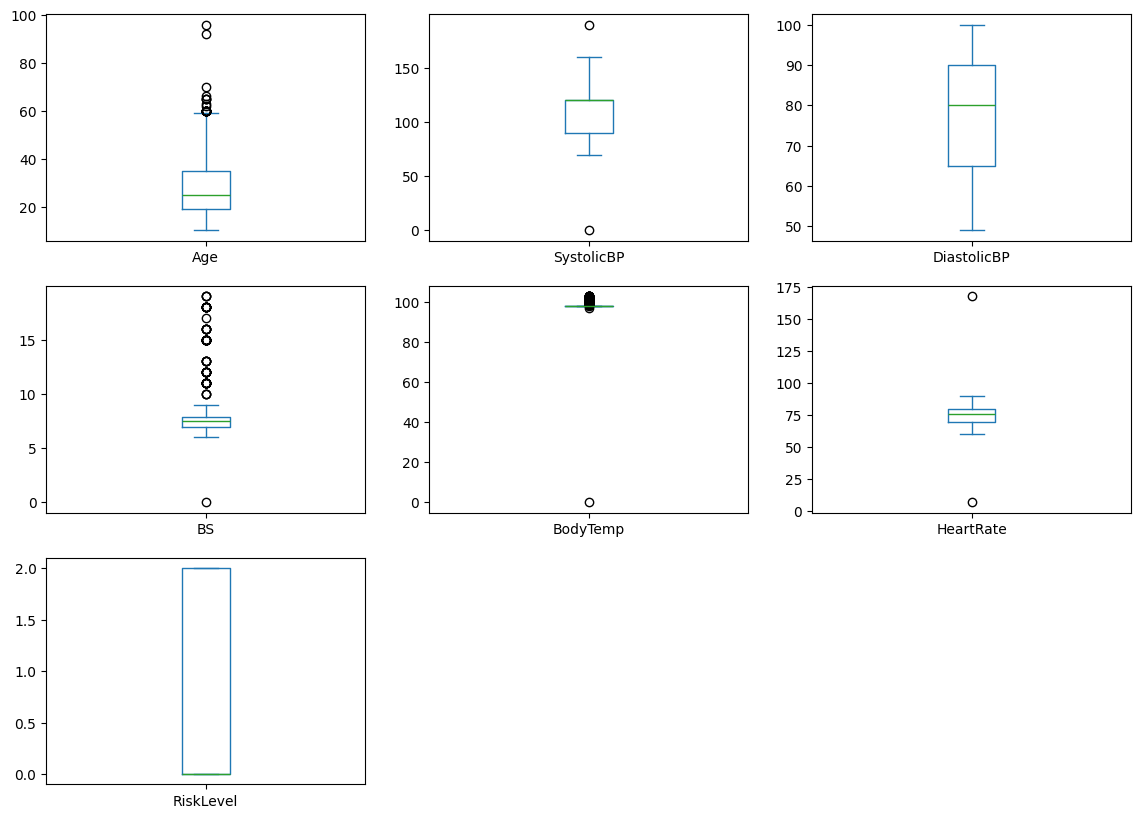

In [14]:
# Plot box plots for numerical attributes
data_cleaned.plot(kind='box', subplots=True, layout=(3,3), figsize=(14,10))
plt.show()


We use box plots to compare the dispersion and derive the central tendency of the dataset's six health attributes.

Age: It is slightly below 30 with an IQR of 20−35 years. The minimum age of the sample population is 25; there are several outliers above 60, and the maximum age is 99. This shows a considerable generation gap in the dataset; in other words, there are highly ageing people.

Systolic Blood Pressure (SystolicBP): The mean systolic blood pressure is approximately 126/85, and the IQR is about 20/20, suggesting that 75% of subjects with hypertension have a systolic blood pressure less than 130 mmHg. This can be an indication of the presence of a few very high and very low values of blood pressure, with a few observations close to 0 but one at 180 mmHg.

Diastolic Blood Pressure (DiastolicBP): It shows that the middle value of diastolic blood pressure is 80 mmHg, and the IQR is defined as 65-90 mmHg. There are no marks that would show that some of them are extreme and hardly fall under the normal range of values.

Blood Sugar (BS): The median blood sugar level for ordinary people is around 7. It is five units (presumably mmol/L) and ranges from about 7 to 9 units of the IQR. There are many high outliers. The extreme value is nearly 20 units, which has many subjects' blood glucose levels abnormally high, possibly due to diabetes or impaired glucose tolerance.

Body Temperature (BodyTemp): The frequency distribution is very acute; most values or percentages lie between 98-99°F. The distribution is relatively narrow, yet many values are significantly higher and lower than the mean, close to the 'normal' body temperature.

Heart Rate: The normal distribution of the registered heart rates is that the median is equal to 75 bpm, with the interquartile range varying between 70 and 80 bpm. These are relatively few compared to the rest of the data, but values range between nearly 0 bpm and 170 bpm. This indicates that several subjects have highly increased heart rate levels that could be due to different diseases.

In [15]:
# Compute correlation matrix
correlation_matrix = data_cleaned.corr()
correlation_matrix

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
Age,1.000000,0.358067,0.343084,0.348567,-0.065681,0.078808,0.179721
SystolicBP,0.358067,1.000000,0.729772,0.335340,-0.089788,0.068914,0.300362
DiastolicBP,0.343084,0.729772,1.000000,0.295213,-0.103375,0.019437,0.261173
BS,0.348567,0.335340,0.295213,1.000000,-0.069500,0.130076,0.546035
BodyTemp,-0.065681,-0.089788,-0.103375,-0.069500,1.000000,0.040498,0.008297
HeartRate,0.078808,0.068914,0.019437,0.130076,0.040498,1.000000,0.201519
RiskLevel,0.179721,0.300362,0.261173,0.546035,0.008297,0.201519,1.000000


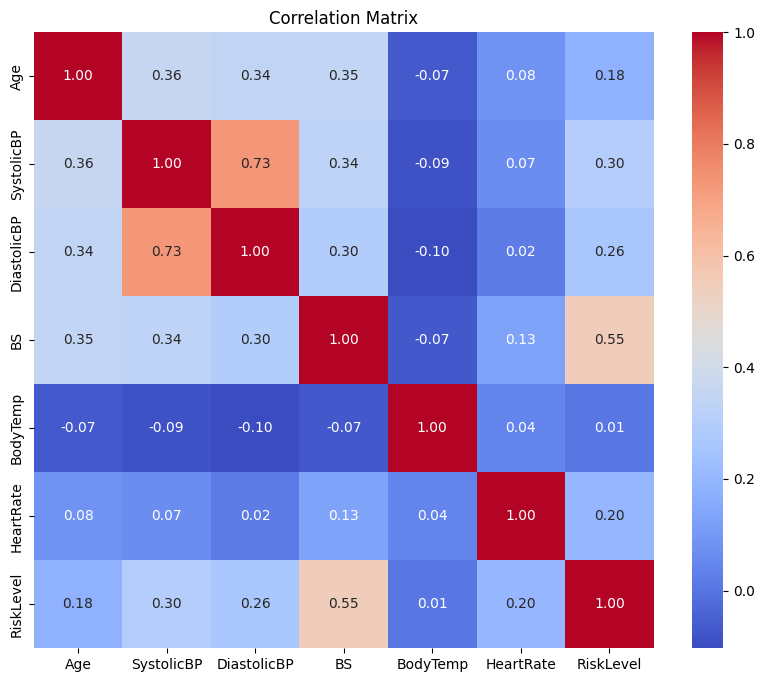

In [18]:
# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Age has a moderate positive relationship with systolic BP, diastolic BP, and BS, with the coefficients found to be 0. 358067, 0. 343084, and 0. 348567, respectively. This implies that elderly persons are slightly more hypertensive and hyperglycemic.

The systolic and Diastolic blood pressure measures also have a significant positive relationship of 0. 729772. However, this was expected since the variables are aspects of blood pressure.

Relatively low correlations between Body Temp and the other variables are manifested, which is quite usual given the independence of most physiological parameters compared to other health indicators.

BS demonstrates the fewest connections with the other variables, with a slight positive relation to HeartRate (0. 130076).

# Splitting the dataset

In [20]:
X = data_cleaned.drop(columns='RiskLevel')
y = data_cleaned["RiskLevel"]

In [23]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

In [24]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
print("Training set:", X_train.shape, y_train.shape)
print("Testing set:", X_test.shape, y_test.shape)


Training set: (366, 6) (366,)
Testing set: (92, 6) (92,)


In [31]:
# #  'data_cleaned' is our DataFrame with the columns ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate', 'RiskLevel']
# X = data_cleaned[['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']]  
# y = data_cleaned['RiskLevel'] 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [35]:
# Initialize an empty DataFrame for results
model_res = pd.DataFrame(columns=['model', 'accuracy', 'precision', 'recall', 'f1_score', 'rmse'])

# Define models
models = {
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42),
    'RandomForestClassifier': RandomForestClassifier(random_state=42),
    'ExtraTreesClassifier': ExtraTreesClassifier(random_state=42),
    'GradientBoostingClassifier': GradientBoostingClassifier(random_state=42),
    'SVC': SVC(random_state=42)
}

# Train, predict, and evaluate each model
for model_name, model in models.items():
    print(f"Training {model_name}...")
    
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']
    
    # Calculate RMSE
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    # Append results to model_res DataFrame
    model_res = model_res.append({
        'model': model_name,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'rmse': rmse
    }, ignore_index=True)

# Display the resuts 
model_res

Training DecisionTreeClassifier...
Training RandomForestClassifier...
Training ExtraTreesClassifier...
Training GradientBoostingClassifier...
Training SVC...


,model,accuracy,precision,recall,f1_score,rmse
0,DecisionTreeClassifier,0.521739,0.494474,0.521739,0.465030,0.966842
1,RandomForestClassifier,0.619565,0.564586,0.619565,0.569716,0.714751
2,ExtraTreesClassifier,0.597826,0.522575,0.597826,0.527104,0.773192
3,GradientBoostingClassifier,0.532609,0.470179,0.532609,0.463263,0.944089
4,SVC,0.673913,0.769900,0.673913,0.583061,0.675664


In [42]:
model_res_sorted = model_res.sort_values(by=["accuracy"], ascending=False)

In [47]:
# Optionally, get the best model
best_model_info = model_res_sorted.iloc[0]
best_model_name = best_model_info['model']
best_model = models[best_model_name]
print("\nBest Model:")
print(best_model_info)
# Train the best model on the entire training set
best_model.fit(X_train, y_train)

# Make predictions on the test set with the best model
best_model_predictions = best_model.predict(X_test)



Best Model:
model             SVC
accuracy     0.673913
precision      0.7699
recall       0.673913
f1_score     0.583061
rmse         0.675664
Name: 4, dtype: object


In [49]:
import joblib
# Train the best model on the entire training set
best_model.fit(X_train, y_train)

# Save the trained best model
joblib.dump(best_model, 'model_1.pkl')
print("Best model saved as 'model_1.pkl'")

Best model saved as 'model_1.pkl'


# Prediction

In [50]:


# Load the trained model
model = joblib.load('model_1.pkl')

# Initialize a StandardScaler (ensure it matches the scaler used during training)
scaler = StandardScaler()

# Define a function to make predictions
def predict_risk_level(age, systolic_bp, diastolic_bp, bs, body_temp, heart_rate):
    # Create a DataFrame from the input values
    input_data = pd.DataFrame({
        'Age': [age],
        'SystolicBP': [systolic_bp],
        'DiastolicBP': [diastolic_bp],
        'BS': [bs],
        'BodyTemp': [body_temp],
        'HeartRate': [heart_rate]
    })

    # The same scaling used during training
    input_data_scaled = scaler.fit_transform(input_data)

    # Predict
    prediction = model.predict(input_data_scaled)

# Map numerical encoding back to the original categories
    labels = {0: 'low risk', 1: 'mid risk', 2: 'high risk'}
    predicted_label = labels[prediction[0]]
    return predicted_label
# Example usage
if __name__ == '__main__':
    # Replace these values with your input data
    age = 22
    systolic_bp = 140
    diastolic_bp = 90
    bs = 13.0
    body_temp = 98.0
    heart_rate = 70

    risk_level = predict_risk_level(age, systolic_bp, diastolic_bp, bs, body_temp, heart_rate)
    print(f'Predicted Risk Level: {risk_level}')


Predicted Risk Level: high risk


c:\Users\jomoz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
